In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [61]:
start = '2014-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [62]:
df = pd.read_csv("Stock Prices Data Set.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [63]:
df = df.drop([ 'symbol', 'date'], axis =1)

In [64]:
df.shape

(497472, 5)

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    497461 non-null  float64
 1   high    497464 non-null  float64
 2   low     497464 non-null  float64
 3   close   497472 non-null  float64
 4   volume  497472 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 19.0 MB


In [66]:
df.isnull().sum()

open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [67]:
df= df.dropna()

In [68]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [69]:
df.describe()

,open,high,low,close,volume
count,497461.000000,497461.000000,497461.000000,497461.000000,4.974610e+05
mean,86.352275,87.132717,85.552616,86.368586,4.253695e+06
std,101.471228,102.312340,100.571231,101.471516,8.232210e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,41.690000,42.090000,41.280000,41.700000,1.080183e+06
50%,64.970000,65.560000,64.357400,64.980000,2.085013e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271999e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


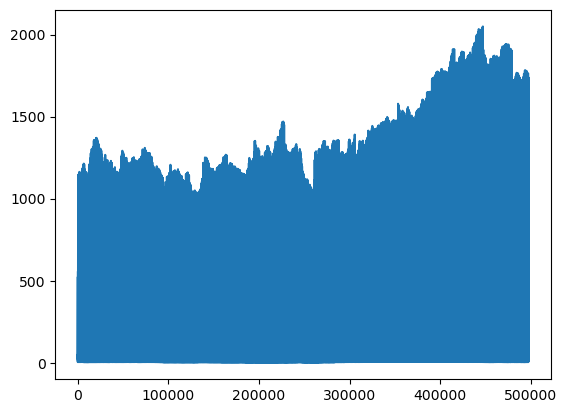

In [70]:

plt.plot(df.close)